# Practice

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn


## Splitting dataset into test and train sets

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train=X_train/255
X_test=X_test/255

In [6]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

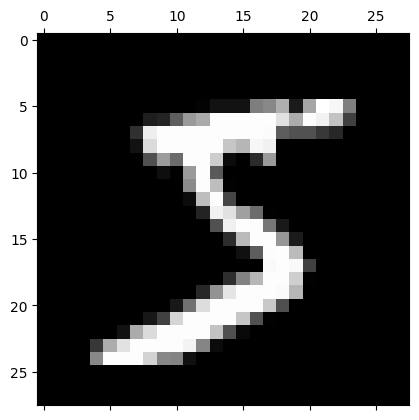

In [7]:
plt.matshow(X_train[0])
plt.gray()

## Reshaping Data

In [8]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_train_flattened.shape,X_test_flattened.shape

((60000, 784), (10000, 784))

In [9]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Training Neural Network

In [10]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4736 - accuracy: 0.8758
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3043 - accuracy: 0.9149
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2837 - accuracy: 0.9208
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2735 - accuracy: 0.9236
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2664 - accuracy: 0.9252
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2620 - accuracy: 0.9267
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2586 - accuracy: 0.9285
Epoch 8/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2556 - accuracy: 0.9291
Epoch 9/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2531 - accuracy: 0.9299
Epoch 10/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.250

In [11]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2775 - accuracy: 0.9247


[0.27752020955085754, 0.9247000217437744]

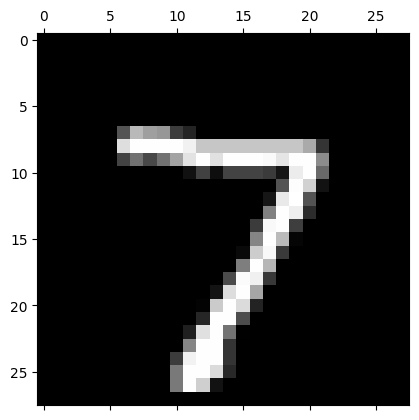

In [12]:
plt.matshow(X_test[0])

## Predicting using the model

In [13]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.1860360e-04, 3.7137807e-10, 1.0894305e-03, 9.6721476e-01,
       1.1317584e-03, 1.5202883e-01, 2.8448763e-10, 9.9991024e-01,
       8.4124833e-02, 7.0595062e-01], dtype=float32)

In [14]:
np.argmax(y_predicted[0])

7

In [15]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [16]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

## Plotting Confusion Matrix

In [17]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    0,    2,    1,    7,    4,    3,    1,    0],
       [   0, 1116,    3,    3,    0,    1,    3,    2,    7,    0],
       [   8,   10,  867,   42,   10,    5,   12,   14,   61,    3],
       [   2,    0,    9,  929,    0,   24,    1,   10,   27,    8],
       [   1,    1,    2,    4,  920,    0,    8,    5,    9,   32],
       [   9,    2,    1,   31,    8,  783,   12,    8,   34,    4],
       [  13,    3,    5,    3,    8,   16,  907,    1,    2,    0],
       [   1,    8,   13,    9,    6,    1,    0,  952,    3,   35],
       [   7,    7,    3,   19,    9,   21,    5,    9,  886,    8],
       [   9,    8,    0,    8,   24,    7,    0,   18,   10,  925]])>

Text(95.72222222222221, 0.5, 'Truth')

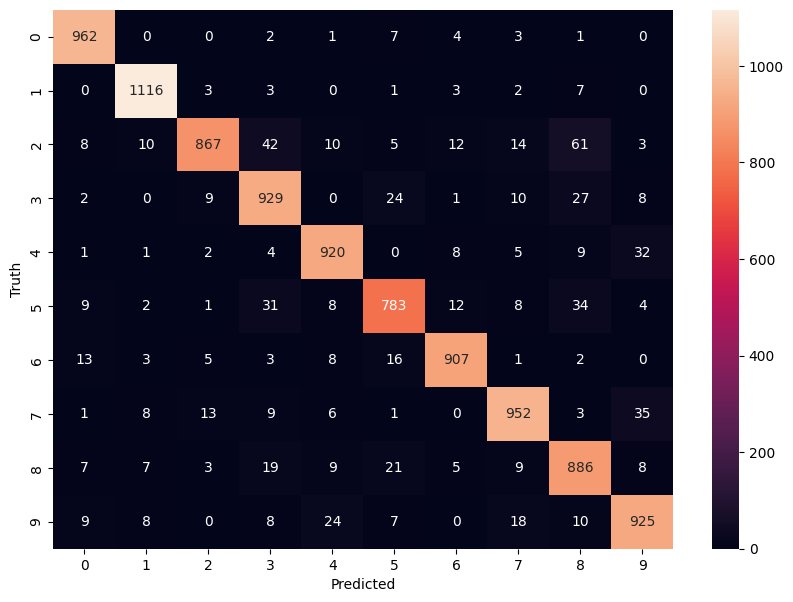

In [18]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Training Neural Network with a hidden layer

In [19]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2721 - accuracy: 0.9218
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1203 - accuracy: 0.9645
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0854 - accuracy: 0.9746
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0650 - accuracy: 0.9801
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0513 - accuracy: 0.9840
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0419 - accuracy: 0.9871
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0332 - accuracy: 0.9896
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0273 - accuracy: 0.9916
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0237 - accuracy: 0.9929
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.019

In [20]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1026 - accuracy: 0.9788


[0.10262411832809448, 0.9787999987602234]

## Plotting Confusion Matrix

313/313 [==============================] - 0s 840us/step


Text(95.72222222222221, 0.5, 'Truth')

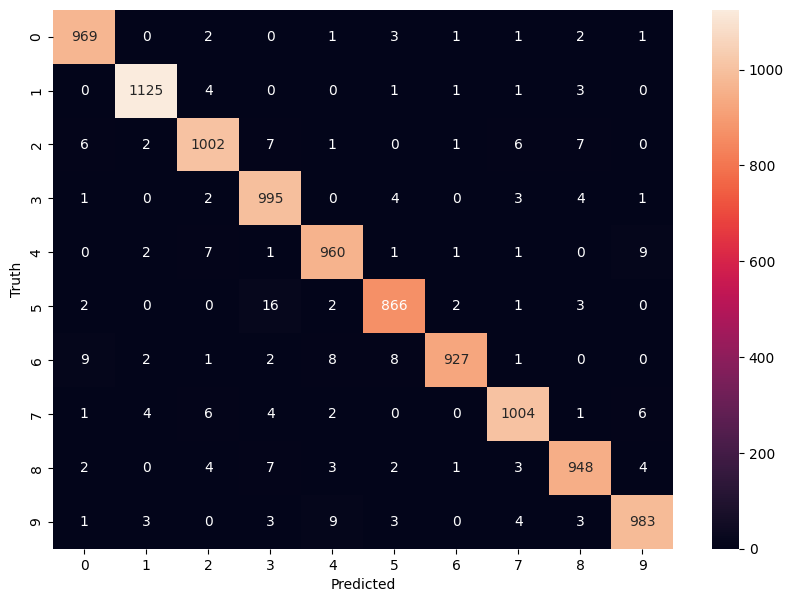

In [21]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Reshaping data at train time itself

In [22]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2774 - accuracy: 0.9207
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1274 - accuracy: 0.9623
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0892 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0672 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0540 - accuracy: 0.9834


In [23]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2718 - accuracy: 0.9218
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1223 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0859 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0665 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0537 - accuracy: 0.9830


In [24]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0716 - accuracy: 0.9777


[0.07155850529670715, 0.9776999950408936]

In [25]:
model.save('./saved_model')

INFO:tensorflow:Assets written to: ./saved_model\assets


# 1 - Post Training Quantization

In [26]:
converter=tf.lite.TFLiteConverter.from_saved_model('./saved_model')
tflite_model=converter.convert()

In [27]:
len(tflite_model)

320040

In [28]:
converter=tf.lite.TFLiteConverter.from_saved_model('./saved_model')
converter.optimizations=[tf.lite.Optimize.DEFAULT]
tflite_quant_model=converter.convert()

In [29]:
len(tflite_quant_model)

84912

Size has reduced by almost 1/4

In [30]:
with open('tflite_model.tflite','wb') as f:
    f.write(tflite_model)
    
with open('tflite_quant_model.tflite','wb') as f:
    f.write(tflite_quant_model)

# 2 - Quantization aware training

In [31]:
import tensorflow_model_optimization as tfmot

quantize_model=tfmot.quantization.keras.quantize_model

q_aware_model=quantize_model(model)

q_aware_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

q_aware_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer (QuantizeLay  (None, 28, 28)           3         
 er)                                                             
                                                                 
 quant_flatten_1 (QuantizeWr  (None, 784)              1         
 apperV2)                                                        
                                                                 
 quant_dense_5 (QuantizeWrap  (None, 100)              78505     
 perV2)                                                          
                                                                 
 quant_dense_6 (QuantizeWrap  (None, 10)               1015      
 perV2)                                                          
                                                                 
Total params: 79,524
Trainable params: 79,510
Non-trai

In [32]:
q_aware_model.fit(X_train, y_train, epochs=1)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0464 - accuracy: 0.9854


In [33]:
q_aware_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0691 - accuracy: 0.9776


[0.06906450539827347, 0.9775999784469604]

In [34]:
converter=tf.lite.TFLiteConverter.from_keras_model(q_aware_model)

converter.optimizations=[tf.lite.Optimize.DEFAULT]
tflite_qaware_model=converter.convert()

INFO:tensorflow:Assets written to: C:\Users\mailt\AppData\Local\Temp\tmp09amh3ch\assets


INFO:tensorflow:Assets written to: C:\Users\mailt\AppData\Local\Temp\tmp09amh3ch\assets
c:\Python\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [36]:
len(tflite_qaware_model)

82776

We have reduced the size even furher with almost the same accuracy

In [35]:
with open ('tflite_qaware_model.tflite','wb') as f:
    f.write(tflite_qaware_model)